# IT Jobs and Venues Data Analysis of some North American Cities (USA and Canada)

In [333]:
# Install beautifulsoup4 if necessary
#!conda install -c anaconda beautifulsoup4 --yes 
#!conda install -c conda-forge folium=0.5.0 --yes 
#!conda install -c conda-forge geopy --yes 

# import the required libraries
import pandas as pd
import numpy as np
import requests
import re
from bs4 import BeautifulSoup
import matplotlib as mpl
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium # map rendering library
# import k-means from clustering stage
from sklearn.cluster import KMeans
import json # library to handle JSON files
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Dataframe used to store Software Engineer Jobs information
columns_df = ["City", "Income", "Quantity"]
income_se_df = pd.DataFrame(columns=columns_df)    

# Dataframe used to store Data Scientist Jobs information
income_ds_df = pd.DataFrame(columns=columns_df)    

In [334]:
def get_job_information(income_df, city, url):
# Function that reads job information given an url

    page = requests.get(url)

    # Read the given URL 
    data = BeautifulSoup(page.text, "html.parser")

    # Get the HTML table inside the HTML data read
    salaries = data.find(id="search_filters_salary").find_all("option")

    for salary in salaries:
        if (not salary['value'] == ""):
            start = salary.text.find("(") + 1
            end = salary.text.find(")")
            total = int(salary.text[start: end].replace(",",""))
            income_df = income_df.append({"City": city, "Income": float(salary['value']), "Quantity":total}, ignore_index=True)    
    return income_df
    

### Software Engineer Job information for Toronto

In [335]:
# Get Software Engineer Job information for Toronto
url = 'https://www.ziprecruiter.com/Jobs/Software-Engineer/-in-Toronto,ON'
income_se_df = get_job_information(income_se_df, "Toronto", url)
income_se_df.head()

,City,Income,Quantity
0,Toronto,85000.0,2078
1,Toronto,105000.0,1730
2,Toronto,120000.0,1337
3,Toronto,130000.0,963
4,Toronto,145000.0,414


### Data Scientist Job information for Toronto

In [336]:
# Get Data Scientist Job information for Toronto
url = 'https://www.ziprecruiter.com/Jobs/Data-Scientist/-in-Toronto,ON'
income_ds_df = get_job_information(income_ds_df, "Toronto", url)
income_ds_df.head()

,City,Income,Quantity
0,Toronto,80000.0,1275
1,Toronto,105000.0,1012
2,Toronto,120000.0,775
3,Toronto,130000.0,570
4,Toronto,145000.0,280


### Software Engineer Job information for Vancouver

In [337]:
# Get Software Engineer Job information for Vancouver
url = 'https://www.ziprecruiter.com/Jobs/Software-Engineer/-in-Vancouver,BC'
income_se_df = get_job_information(income_se_df, "Vancouver", url)
income_se_df

,City,Income,Quantity
0,Toronto,85000.0,2078
1,Toronto,105000.0,1730
2,Toronto,120000.0,1337
3,Toronto,130000.0,963
4,Toronto,145000.0,414
5,Vancouver,90000.0,1013
6,Vancouver,110000.0,828
7,Vancouver,120000.0,684
8,Vancouver,135000.0,396
9,Vancouver,145000.0,223


### Data Scientist Job information for Vancouver

In [338]:
# Get Data Scientist Job information for Vancouver
url = 'https://www.ziprecruiter.com/Jobs/Data-Scientist/-in-Vancouver,BC'
income_ds_df = get_job_information(income_ds_df, "Vancouver", url)
income_ds_df

,City,Income,Quantity
0,Toronto,80000.0,1275
1,Toronto,105000.0,1012
2,Toronto,120000.0,775
3,Toronto,130000.0,570
4,Toronto,145000.0,280
5,Vancouver,90000.0,447
6,Vancouver,110000.0,369
7,Vancouver,120000.0,288
8,Vancouver,130000.0,219
9,Vancouver,145000.0,104


### Software Engineer Job information for San Francisco

In [339]:
# Get Software Engineer Job information for San Francisco
url = 'https://www.ziprecruiter.com/Jobs/Software-Engineer/-in-San-Francisco,CA'
income_se_df = get_job_information(income_se_df, "San Francisco", url)
income_se_df

,City,Income,Quantity
0,Toronto,85000.0,2078
1,Toronto,105000.0,1730
2,Toronto,120000.0,1337
3,Toronto,130000.0,963
4,Toronto,145000.0,414
5,Vancouver,90000.0,1013
6,Vancouver,110000.0,828
7,Vancouver,120000.0,684
8,Vancouver,135000.0,396
9,Vancouver,145000.0,223


### Data Scientist Job information for San Francisco

In [340]:
# Get Data Scientist Job information for San Francisco
url = 'https://www.ziprecruiter.com/Jobs/Data-Scientist/-in-San-Francisco,CA'
income_ds_df = get_job_information(income_ds_df, "San Francisco", url)
income_ds_df

,City,Income,Quantity
0,Toronto,80000.0,1275
1,Toronto,105000.0,1012
2,Toronto,120000.0,775
3,Toronto,130000.0,570
4,Toronto,145000.0,280
5,Vancouver,90000.0,447
6,Vancouver,110000.0,369
7,Vancouver,120000.0,288
8,Vancouver,130000.0,219
9,Vancouver,145000.0,104


### Software Engineer Job information for New York

In [341]:
# Get Software Engineer Job information for New York
url = 'https://www.ziprecruiter.com/Jobs/Software-Engineer/-in-New-York,NY'   
income_se_df = get_job_information(income_se_df, "New York", url)
income_se_df

,City,Income,Quantity
0,Toronto,85000.0,2078
1,Toronto,105000.0,1730
2,Toronto,120000.0,1337
3,Toronto,130000.0,963
4,Toronto,145000.0,414
5,Vancouver,90000.0,1013
6,Vancouver,110000.0,828
7,Vancouver,120000.0,684
8,Vancouver,135000.0,396
9,Vancouver,145000.0,223


### Data Scientist Job information for New York

In [342]:
# Get Data Scientist Job information for New York
url = 'https://www.ziprecruiter.com/Jobs/Data-Scientist/-in-New-York,NY'    
income_ds_df = get_job_information(income_ds_df, "New York", url)
income_ds_df

,City,Income,Quantity
0,Toronto,80000.0,1275
1,Toronto,105000.0,1012
2,Toronto,120000.0,775
3,Toronto,130000.0,570
4,Toronto,145000.0,280
5,Vancouver,90000.0,447
6,Vancouver,110000.0,369
7,Vancouver,120000.0,288
8,Vancouver,130000.0,219
9,Vancouver,145000.0,104


### Software Engineer Job information for Austin

In [343]:
# Get Software Engineer Job information for Austin
url = 'https://www.ziprecruiter.com/Jobs/Software-Engineer/-in-Austin,TX'
income_se_df = get_job_information(income_se_df, "Austin", url)
income_se_df

,City,Income,Quantity
0,Toronto,85000.0,2078
1,Toronto,105000.0,1730
2,Toronto,120000.0,1337
3,Toronto,130000.0,963
4,Toronto,145000.0,414
5,Vancouver,90000.0,1013
6,Vancouver,110000.0,828
7,Vancouver,120000.0,684
8,Vancouver,135000.0,396
9,Vancouver,145000.0,223


### Data Scientist Job information for Austin

In [344]:
# Get Data Scientist Job information for Austin
url = 'https://www.ziprecruiter.com/Jobs/Data-Scientist/-in-Austin,TX'
income_ds_df = get_job_information(income_ds_df, "Austin", url)
income_ds_df

,City,Income,Quantity
0,Toronto,80000.0,1275
1,Toronto,105000.0,1012
2,Toronto,120000.0,775
3,Toronto,130000.0,570
4,Toronto,145000.0,280
5,Vancouver,90000.0,447
6,Vancouver,110000.0,369
7,Vancouver,120000.0,288
8,Vancouver,130000.0,219
9,Vancouver,145000.0,104


### Software Engineer Job information for Seattle

In [345]:
# Get Data Scientist Job information for Seattle
url = 'https://www.ziprecruiter.com/Jobs/Data-Scientist/-in-Seattle,WA'
income_ds_df = get_job_information(income_ds_df, "Seattle", url)
income_ds_df

,City,Income,Quantity
0,Toronto,80000.0,1275
1,Toronto,105000.0,1012
2,Toronto,120000.0,775
3,Toronto,130000.0,570
4,Toronto,145000.0,280
5,Vancouver,90000.0,447
6,Vancouver,110000.0,369
7,Vancouver,120000.0,288
8,Vancouver,130000.0,219
9,Vancouver,145000.0,104


### Data Scientist Job information for Seattle

In [346]:
# Get Software Engineer Job information for Seattle
url = 'https://www.ziprecruiter.com/Jobs/Software-Engineer/-in-Seattle,WA'
income_se_df = get_job_information(income_se_df, "Seattle", url)
income_se_df

,City,Income,Quantity
0,Toronto,85000.0,2078
1,Toronto,105000.0,1730
2,Toronto,120000.0,1337
3,Toronto,130000.0,963
4,Toronto,145000.0,414
5,Vancouver,90000.0,1013
6,Vancouver,110000.0,828
7,Vancouver,120000.0,684
8,Vancouver,135000.0,396
9,Vancouver,145000.0,223


City,Austin,New York,San Francisco,Seattle,Toronto,Vancouver
Income,,,,,,
85000.0,3915,0,0,0,2078,0
90000.0,0,0,0,0,0,1013
95000.0,0,12236,0,0,0,0
105000.0,3245,0,0,7624,1730,0
110000.0,0,0,11232,0,0,828
115000.0,0,10219,0,0,0,0
120000.0,2404,0,0,0,1337,684
125000.0,0,0,0,6329,0,0
130000.0,1669,7859,9467,0,963,0


Text(0, 0.5, '# of oppenings')

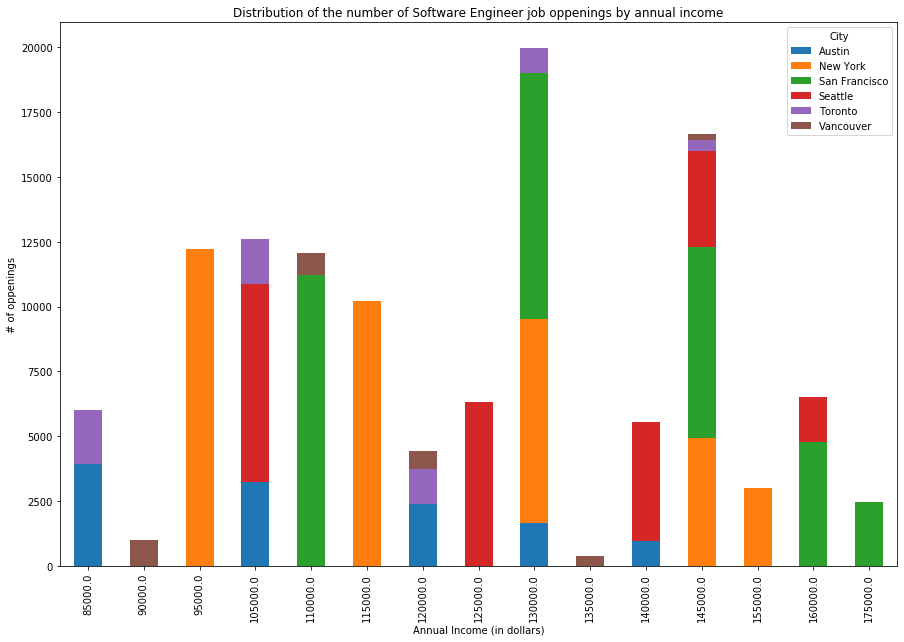

In [347]:
pivot_df = income_se_df.pivot(index='Income', columns='City', values='Quantity')
pivot_df
pivot_df = pivot_df.fillna(0)
display(pivot_df)
pivot_df.plot.bar(stacked=True, figsize=(15,10))
plt.title("Distribution of the number of Software Engineer job oppenings by annual income")
plt.xlabel("Annual Income (in dollars)")
plt.ylabel("# of oppenings")

City,Austin,New York,San Francisco,Seattle,Toronto,Vancouver
Income,,,,,,
75000.0,1876,0,0,0,0,0
80000.0,0,11831,0,0,1275,0
90000.0,0,0,0,0,0,447
95000.0,0,0,9055,4530,0,0
100000.0,1534,0,0,0,0,0
105000.0,0,9408,0,0,1012,0
110000.0,0,0,0,0,0,369
115000.0,1174,0,0,0,0,0
120000.0,0,7668,7376,3692,775,288


Text(0, 0.5, '# of oppenings')

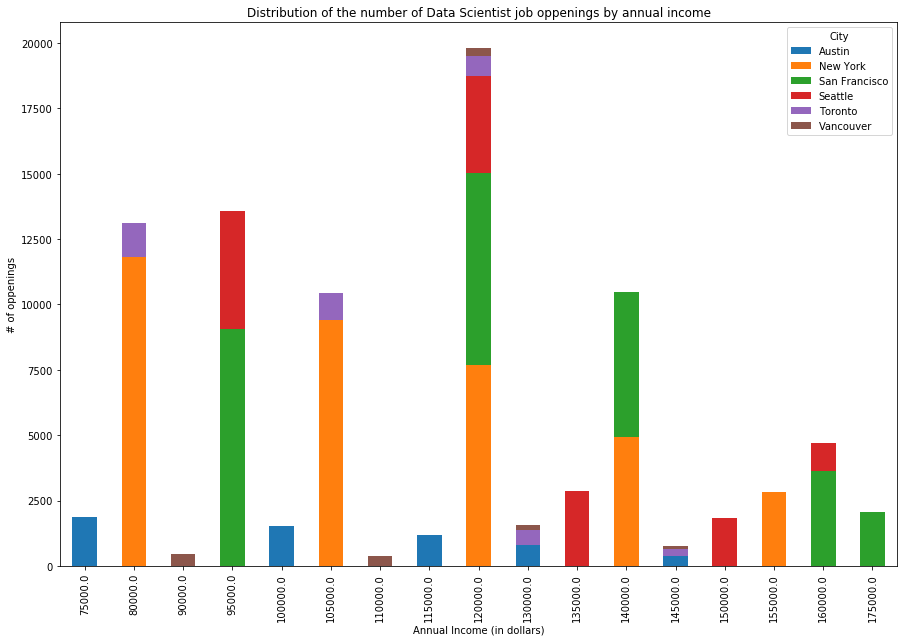

In [348]:
pivot_df = income_ds_df.pivot(index='Income', columns='City', values='Quantity')
pivot_df
pivot_df = pivot_df.fillna(0)
display(pivot_df)
pivot_df.plot.bar(stacked=True, figsize=(15,10))
plt.title("Distribution of the number of Data Scientist job oppenings by annual income")
plt.xlabel("Annual Income (in dollars)")
plt.ylabel("# of oppenings")

In [349]:
def to_celsius(temp_F):
    #(32 °F − 32) × 5/9 = 0 °C
    return round((temp_F - 32) * (5/9))

def get_temperature_information(url, city, df_t, celsius):

    page = requests.get(url)
    
    # Read the given URL page
    data = BeautifulSoup(page.text, "html.parser")
    # Get the HTML table inside the HTML data read
    tables = data.find_all(class_="infobox")

    low = []
    high = []
    
    # Extracting the HTML data
    for table in tables:
        innerTables = table.find_all(class_="infobox")
    
        get_next_table = True
    
        for innerTable in innerTables:
            trs = innerTable.find_all("tr")
            tr_i = 0

            if get_next_table:
                get_next_table = False

                for tr in trs:
                    tds = tr.find_all("td")
                    tr_i = tr_i + 1

                    if tr_i > 1 and tr_i < 3:
                        i = 0
                        for td in tds:
                            i = i+1
                            divs = td.find_all("div")
                            div_i = 0
                            for div in divs:
                                div_i = div_i + 1

                                if div_i == 7:
                                    if celsius:
                                        value = re.sub(r'[^\x00-\x7F]+','-', div.text)
                                        value = int(value)
                                    else:
                                        value = to_celsius(int(div.text))
                                    high.append(value)
                                elif div_i == 8:
                                    if celsius:
                                        value = re.sub(r'[^\x00-\x7F]+','-', div.text)
                                        value = int(value)
                                    else:
                                        value = to_celsius(int(div.text))
                                    low.append(value)


    df = pd.DataFrame(columns=["January","February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December", "Type"])
    low.append("Min")
    high.append("Max")

    a_series = pd.Series(high, index = df.columns)
    df = df.append(a_series, ignore_index=True)
    a_series = pd.Series(low, index = df.columns)
    df = df.append(a_series, ignore_index=True)

    a_series = pd.Series(df.mean(axis = 0), index = df_t.columns)
    df_t = df_t.append(a_series, ignore_index=True)
    df_t = df_t.replace(np.nan, city)
    
    df.set_index('Type', inplace=True)
    df = df.transpose()
    
    df.plot(kind="bar", figsize=(14, 8), color=('#DD5437','#2A9FD1'))
    plt.title("Maximum and Minimum average temperature per month in " + city)
    plt.xlabel("Month")
    plt.ylabel("Temperature")
    plt.grid()
    plt.show()
    
    return df_t

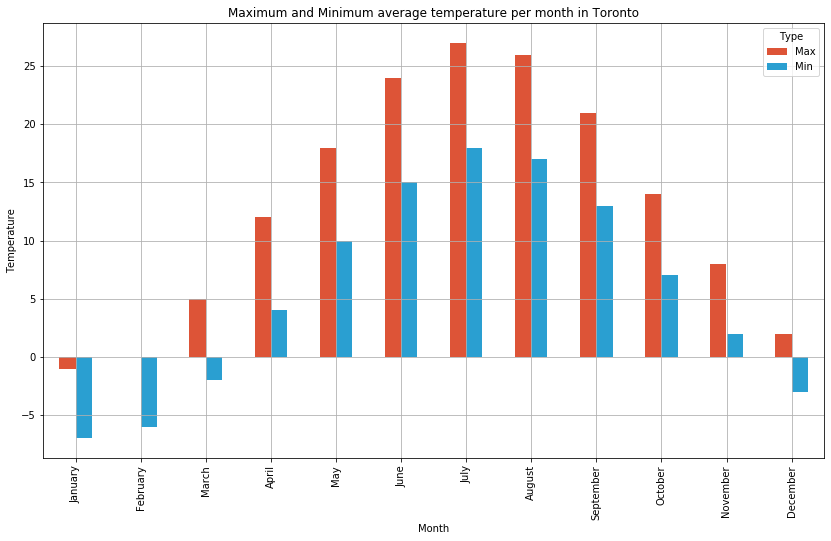

,January,February,March,April,May,June,July,August,September,October,November,December,City
0,-4.0,-3.0,1.5,8.0,14.0,19.5,22.5,21.5,17.0,10.5,5.0,-0.5,Toronto


In [350]:
url = 'https://en.wikipedia.org/wiki/Toronto'
avg_temperature = pd.DataFrame(columns=["January","February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December", "City"])
avg_temperature = get_temperature_information(url, "Toronto", avg_temperature, True)
avg_temperature.head()

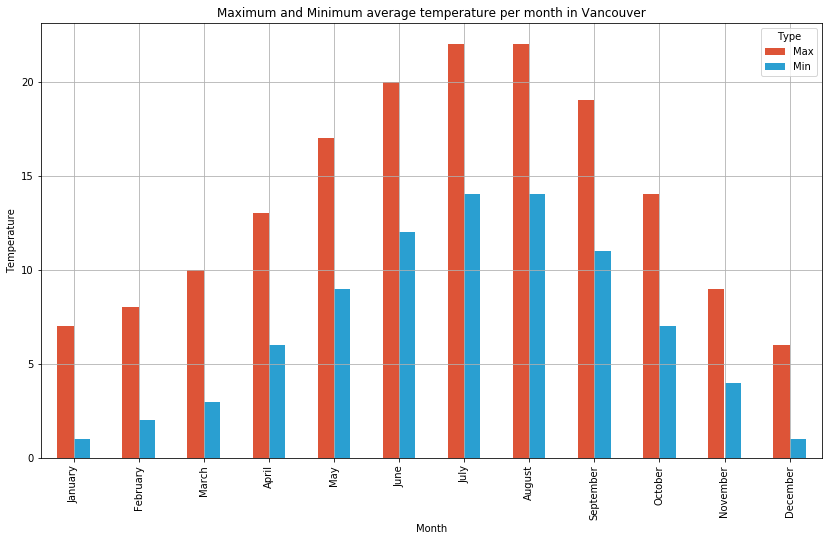

In [351]:
url = 'https://en.wikipedia.org/wiki/Vancouver'
avg_temperature = get_temperature_information(url, "Vancouver", avg_temperature, True)

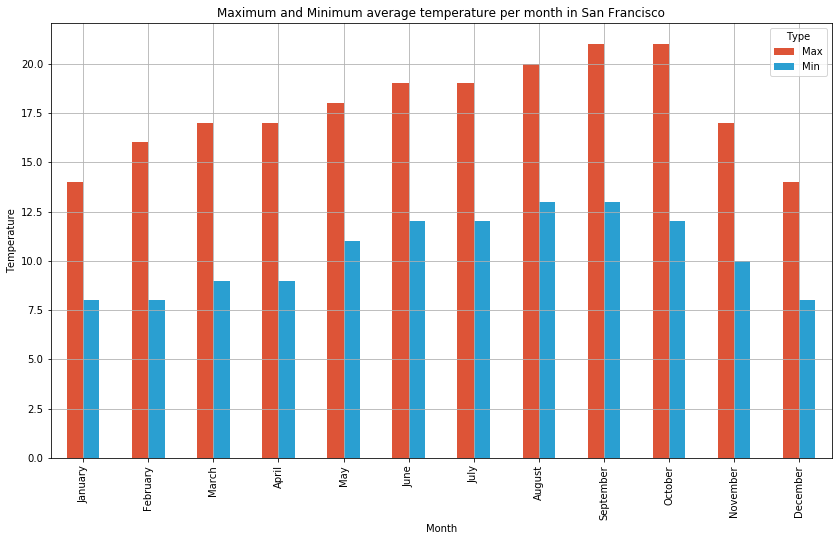

In [352]:
url = 'https://en.wikipedia.org/wiki/San_Francisco'
avg_temperature = get_temperature_information(url, "San Francisco", avg_temperature, False)

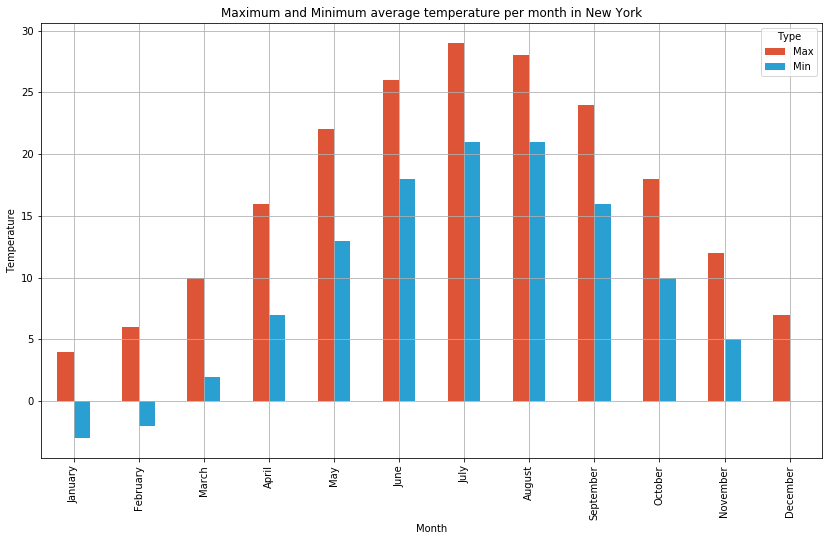

In [353]:
url = 'https://en.wikipedia.org/wiki/New_York_City'
avg_temperature = get_temperature_information(url, "New York", avg_temperature, False)

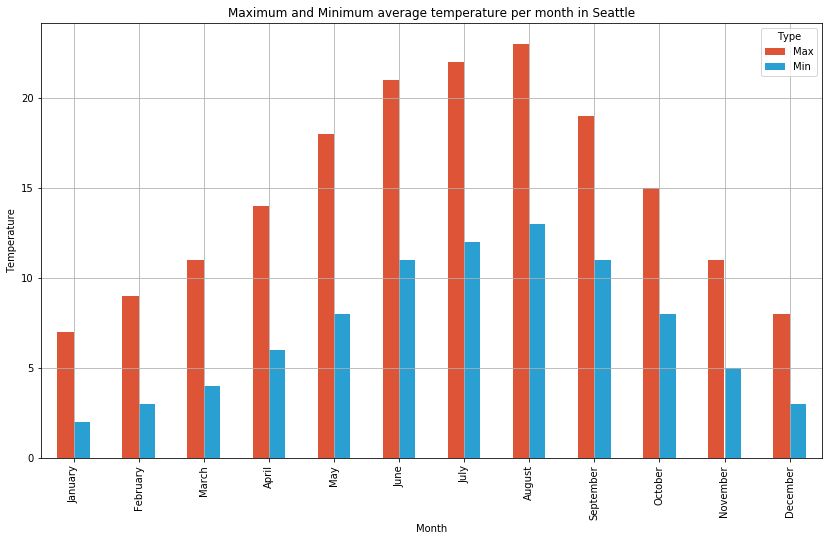

In [354]:
url = 'https://en.wikipedia.org/wiki/Seattle'
avg_temperature = get_temperature_information(url, "Seattle", avg_temperature, False)


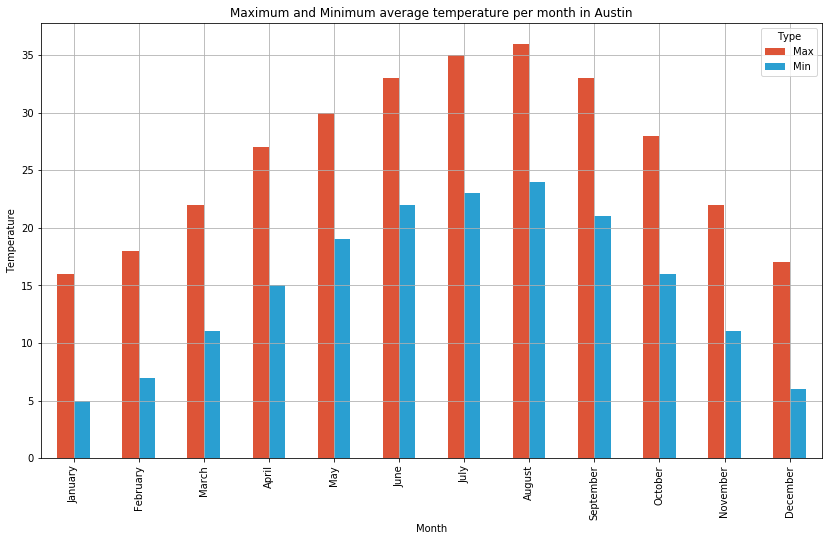

In [355]:
url = 'https://en.wikipedia.org/wiki/Austin'
avg_temperature = get_temperature_information(url, "Austin", avg_temperature, False)

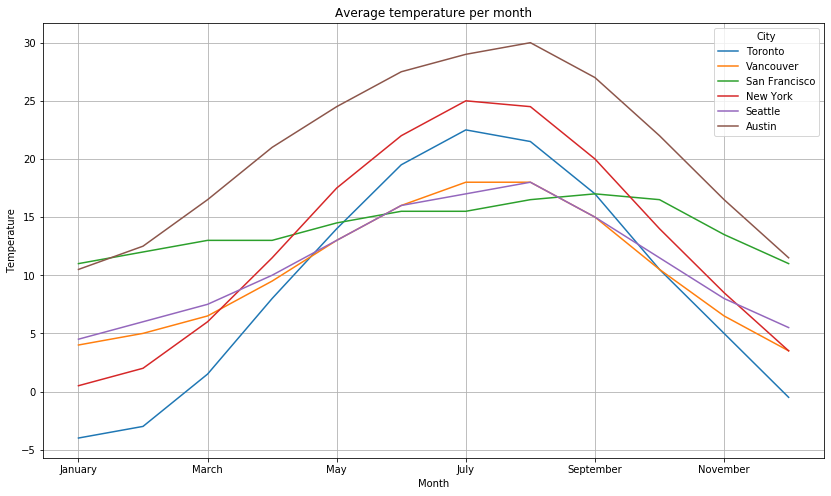

In [356]:
avg_temperature.set_index('City', inplace=True)

avg_temperature = avg_temperature.transpose()
avg_temperature.plot(kind="line", figsize=(14, 8))
plt.title("Average temperature per month")
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.grid()
plt.show()




In [357]:
CLIENT_ID = 'TB2N2LFHSQ0NEA3ICVU2QRJALSCWYL0NDBS3J323SCT0JLHU' # your Foursquare ID
CLIENT_SECRET = 'BW2Z3PIZBA3K00YH00QU4XM2UXWFCUJQ3NTC2UKSXKMPIWRC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TB2N2LFHSQ0NEA3ICVU2QRJALSCWYL0NDBS3J323SCT0JLHU
CLIENT_SECRET:BW2Z3PIZBA3K00YH00QU4XM2UXWFCUJQ3NTC2UKSXKMPIWRC


In [358]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [359]:
# function that get nearby venues given latitude,longitude and radius
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    #i = 0
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        #i = i + 1
        LIMIT = 300        
        # create the API request URL
        
        #if i < 50:
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return nearby_venues

In [360]:
#cities = pd.DataFrame(columns=["City", "Neighborhood", "Latitude", "Longitude"])

url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
page = requests.get(url)
# Read the URL page at Wikipedia
data = BeautifulSoup(page.text, "html.parser")

# Get the HTML table inside the HTML data read
table = data.find('table')

# Get all the rows of the HTML table
table_rows = table.find_all('tr')

# Get the header TH
header = table_rows[0].find_all('th')

# Get the column values (TD) of the header TH, which will be the column labels of the dataframe
labels = [table_rows[0].text for table_rows[0] in header]
# Clean the '\n' special character
labels = np.char.replace(labels, '\n', '')

# Create the dataframe
# The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
df = pd.DataFrame(columns = labels)

# Get all the other columns (TD) from the rows (TR)
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    # Ignore the first row (header) and the rows which have "Not assigned" boroughs
    # Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned
    if (row != [] and row[1] != "Not assigned\n"):
        row = pd.Series(row,labels)
        df = df.append([row],ignore_index=True)     

# Clean the data removing '\n'        
df.replace('\n','', regex=True, inplace=True)   

# Read the geospatial data csv
geospatial = pd.read_csv("http://cocl.us/Geospatial_data") 

# Change the dataframes indexes, in order to make it possible to merge them later
df.set_index('Postal Code', inplace=True)
geospatial.set_index('Postal Code', inplace=True)

# Merge both dataframes
cities = df.merge(geospatial, left_index=True, right_index=True)

cities.reset_index(inplace=True)
cities.drop('Postal Code', axis=1, inplace=True)

# Work with only boroughs that contain the word Toronto 
cities = cities[cities['Borough'].str.contains("Toronto")].reset_index(drop=True)
cities.drop('Borough', axis=1, inplace=True)
cities['City'] = "Toronto"

# Define City as the first column
cols = cities.columns.tolist()
cols = cols[-1:] + cols[:-1]
cities = cities[cols]

cities

,City,Neighborhood,Latitude,Longitude
0,Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,Toronto,St. James Town,43.651494,-79.375418
4,Toronto,The Beaches,43.676357,-79.293031
5,Toronto,Berczy Park,43.644771,-79.373306
6,Toronto,Central Bay Street,43.657952,-79.387383
7,Toronto,Christie,43.669542,-79.422564
8,Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
9,Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


In [361]:
def get_latitude_longitude(city, neighborhood, cities_df, state):
    
    address = neighborhood + ", " + city + ", " + state
    print(address)
    geolocator = Nominatim(user_agent="on_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    cities_df = cities_df.append({"City": city, "Neighborhood": neighborhood, "Latitude":latitude, "Longitude":longitude}, ignore_index=True)
    return cities_df

In [362]:
cities = get_latitude_longitude("Vancouver", "Arbutus ridge", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Downtown", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Dunbar-Southlands", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Fairview", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Grandview-Woodland", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Hastings-Sunrise", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Kensington-Cedar Cottage", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Kerrisdale", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Killarney", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Kitsilano", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Marpole", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Mount Pleasant", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Renfrew-Collingwood", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Riley Park", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Shaughnessy", cities, "BC")
cities = get_latitude_longitude("Vancouver", "South Cambie", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Strathcona", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Sunset", cities, "BC")
cities = get_latitude_longitude("Vancouver", "Victoria-Fraserview", cities, "BC")
cities = get_latitude_longitude("Vancouver", "West End", cities, "BC")
cities = get_latitude_longitude("Vancouver", "West Point Grey", cities, "BC")


Arbutus ridge, Vancouver, BC
Downtown, Vancouver, BC
Dunbar-Southlands, Vancouver, BC
Fairview, Vancouver, BC
Grandview-Woodland, Vancouver, BC
Hastings-Sunrise, Vancouver, BC
Kensington-Cedar Cottage, Vancouver, BC
Kerrisdale, Vancouver, BC
Killarney, Vancouver, BC
Kitsilano, Vancouver, BC
Marpole, Vancouver, BC
Mount Pleasant, Vancouver, BC
Renfrew-Collingwood, Vancouver, BC
Riley Park, Vancouver, BC
Shaughnessy, Vancouver, BC
South Cambie, Vancouver, BC
Strathcona, Vancouver, BC
Sunset, Vancouver, BC
Victoria-Fraserview, Vancouver, BC
West End, Vancouver, BC
West Point Grey, Vancouver, BC


In [363]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
    
neighborhoods_data = newyork_data['features']

for data in neighborhoods_data:
    print(data['properties']['borough'])
    if data['properties']['borough'] == 'Manhattan':
        neighborhood_name = data['properties']['name']

        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]

        cities = cities.append({'City': 'New York', 'Neighborhood': neighborhood_name, 'Latitude': neighborhood_lat, 'Longitude': neighborhood_lon}, ignore_index=True)

    

Data downloaded!
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Manhattan
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Bronx
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhatt

In [364]:
cities = get_latitude_longitude("San Francisco", "Fisher", cities, "CA")
cities = get_latitude_longitude("San Francisco", "North Beach", cities, "CA")
cities = get_latitude_longitude("San Francisco", "Chinatown", cities, "CA")
cities = get_latitude_longitude("San Francisco", "Financial District", cities, "CA")
cities = get_latitude_longitude("San Francisco", "Union Square", cities, "CA")
cities = get_latitude_longitude("San Francisco", "Central Market", cities, "CA")
cities = get_latitude_longitude("San Francisco", "SOMA", cities, "CA")
cities = get_latitude_longitude("San Francisco", "Civic Center", cities, "CA")
cities = get_latitude_longitude("San Francisco", "Japantown", cities, "CA")
cities = get_latitude_longitude("San Francisco", "Bayview", cities, "CA")
cities = get_latitude_longitude("San Francisco", "Mission District", cities, "CA")
cities = get_latitude_longitude("San Francisco", "Sunset", cities, "CA")


Fisher, San Francisco, CA
North Beach, San Francisco, CA
Chinatown, San Francisco, CA
Financial District, San Francisco, CA
Union Square, San Francisco, CA
Central Market, San Francisco, CA
SOMA, San Francisco, CA
Civic Center, San Francisco, CA
Japantown, San Francisco, CA
Bayview, San Francisco, CA
Mission District, San Francisco, CA
Sunset, San Francisco, CA


In [365]:
cities = get_latitude_longitude("Seattle", "International District", cities, "WA")
cities = get_latitude_longitude("Seattle", "Eastlake", cities, "WA")
cities = get_latitude_longitude("Seattle", "Retail District", cities, "WA")
cities = get_latitude_longitude("Seattle", "West Edge", cities, "WA")
cities = get_latitude_longitude("Seattle", "Broadview", cities, "WA")
cities = get_latitude_longitude("Seattle", "Cedar Park", cities, "WA")
cities = get_latitude_longitude("Seattle", "Pioneer Square", cities, "WA")
cities = get_latitude_longitude("Seattle", "Highland Park", cities, "WA")
cities = get_latitude_longitude("Seattle", "Capitol Hill", cities, "WA")
cities = get_latitude_longitude("Seattle", "Downtown", cities, "WA")
cities = get_latitude_longitude("Seattle", "First Hill", cities, "WA")


International District, Seattle, WA
Eastlake, Seattle, WA
Retail District, Seattle, WA
West Edge, Seattle, WA
Broadview, Seattle, WA
Cedar Park, Seattle, WA
Pioneer Square, Seattle, WA
Highland Park, Seattle, WA
Capitol Hill, Seattle, WA
Downtown, Seattle, WA
First Hill, Seattle, WA


In [366]:
cities = get_latitude_longitude("Austin", "Downtown", cities, "TX")
cities = get_latitude_longitude("Austin", "Hancock", cities, "TX")
cities = get_latitude_longitude("Austin", "Heritage", cities, "TX")
cities = get_latitude_longitude("Austin", "West Downtown", cities, "TX")
cities = get_latitude_longitude("Austin", "Rosedale", cities, "TX")



Downtown, Austin, TX
Hancock, Austin, TX
Heritage, Austin, TX
West Downtown, Austin, TX
Rosedale, Austin, TX


In [367]:
display(cities)
venues = getNearbyVenues(names=cities['Neighborhood'], latitudes=cities['Latitude'], longitudes=cities['Longitude'])

,City,Neighborhood,Latitude,Longitude
0,Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,Toronto,St. James Town,43.651494,-79.375418
4,Toronto,The Beaches,43.676357,-79.293031
...,...,...,...,...
123,Austin,Downtown,30.268054,-97.744764
124,Austin,Hancock,30.295896,-97.724768
125,Austin,Heritage,30.345796,-97.690991
126,Austin,West Downtown,30.268054,-97.744764


Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West,  Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport


In [368]:
# one hot encoding
venues_one_hot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")
venues_one_hot.head()

,ATM,Acai House,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,...,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [369]:
venues_one_hot

,ATM,Acai House,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,...,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6857,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [370]:
# add neighborhoods column back to dataframe
venues_one_hot['Neighborhoods'] = venues['Neighborhood'] 

print(venues_one_hot.shape)

# move neighborhoods column to the first column
fixed_columns = [venues_one_hot.columns[-1]] + list(venues_one_hot.columns[:-1])
venues_one_hot = venues_one_hot[fixed_columns]
venues_one_hot.head()

(6862, 416)


,Neighborhoods,ATM,Acai House,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Gate,...,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [371]:
venues_grouped = venues_one_hot.groupby('Neighborhoods').mean().reset_index()
venues_grouped

,Neighborhoods,ATM,Acai House,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Gate,...,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Arbutus ridge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,Battery Park City,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.015152,0.030303,0.0,0.015152,0.000000,0.000000
2,Bayview,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,Berczy Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,Broadview,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,West Edge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.010638,0.0,0.000000,0.010638,0.0,0.000000,0.000000,0.010638
115,West End,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.016393,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.016393,0.000000,0.000000
116,West Point Grey,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.022727,0.0,0.000000,0.022727,0.000000
117,West Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.050000,0.010000,0.0,0.000000,0.000000,0.000000


In [372]:
num_top_venues = 5

for hood in venues_grouped['Neighborhoods']:
    print("----"+hood+"----")
    temp = venues_grouped[venues_grouped['Neighborhoods'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arbutus ridge----
            venue  freq
0          Bakery   0.2
1             Spa   0.2
2   Grocery Store   0.2
3  Nightlife Spot   0.2
4       Pet Store   0.2


----Battery Park City----
           venue  freq
0           Park  0.12
1    Coffee Shop  0.08
2          Hotel  0.06
3  Memorial Site  0.05
4            Gym  0.05


----Bayview----
                             venue  freq
0                           Bakery  0.15
1  Southern / Soul Food Restaurant  0.15
2                           Bistro  0.08
3                              Gym  0.08
4                         Pharmacy  0.08


----Berczy Park----
                venue  freq
0         Coffee Shop  0.07
1        Cocktail Bar  0.05
2  Seafood Restaurant  0.04
3              Bakery  0.04
4                 Pub  0.04


----Broadview----
                    venue  freq
0  Furniture / Home Store  0.11
1                Beer Bar  0.11
2       Convenience Store  0.11
3              Food Truck  0.11
4         Thai Restaurant  0.11




In [373]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [374]:
num_top_venues = 15

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhoods']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhoods'] = venues_grouped['Neighborhoods']

for ind in np.arange(venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Arbutus ridge,Pet Store,Grocery Store,Spa,Bakery,Nightlife Spot,Zoo,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit
1,Battery Park City,Park,Coffee Shop,Hotel,Memorial Site,Gym,Playground,Shopping Mall,Food Court,Boat or Ferry,Gourmet Shop,Plaza,Wine Shop,Building,Scenic Lookout,Steakhouse
2,Bayview,Southern / Soul Food Restaurant,Bakery,BBQ Joint,Mexican Restaurant,Café,Pharmacy,Dance Studio,Bistro,Piercing Parlor,Gym,Pool,Egyptian Restaurant,Event Space,Eastern European Restaurant,Electronics Store
3,Berczy Park,Coffee Shop,Cocktail Bar,Restaurant,Bakery,Seafood Restaurant,Café,Pub,Cheese Shop,Beer Bar,Bagel Shop,Gourmet Shop,Tailor Shop,Basketball Stadium,Clothing Store,Beach
4,Broadview,Antique Shop,Furniture / Home Store,Beer Bar,Sushi Restaurant,Video Store,Thai Restaurant,Convenience Store,Pizza Place,Food Truck,Flea Market,Event Space,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant


In [375]:
# set number of clusters
kclusters = 5

grouped_clustering = venues_grouped.drop('Neighborhoods', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2], dtype=int32)

In [376]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

neighborhoods_venues_sorted


,Cluster Labels,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,2,Arbutus ridge,Pet Store,Grocery Store,Spa,Bakery,Nightlife Spot,Zoo,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit
1,2,Battery Park City,Park,Coffee Shop,Hotel,Memorial Site,Gym,Playground,Shopping Mall,Food Court,Boat or Ferry,Gourmet Shop,Plaza,Wine Shop,Building,Scenic Lookout,Steakhouse
2,2,Bayview,Southern / Soul Food Restaurant,Bakery,BBQ Joint,Mexican Restaurant,Café,Pharmacy,Dance Studio,Bistro,Piercing Parlor,Gym,Pool,Egyptian Restaurant,Event Space,Eastern European Restaurant,Electronics Store
3,2,Berczy Park,Coffee Shop,Cocktail Bar,Restaurant,Bakery,Seafood Restaurant,Café,Pub,Cheese Shop,Beer Bar,Bagel Shop,Gourmet Shop,Tailor Shop,Basketball Stadium,Clothing Store,Beach
4,0,Broadview,Antique Shop,Furniture / Home Store,Beer Bar,Sushi Restaurant,Video Store,Thai Restaurant,Convenience Store,Pizza Place,Food Truck,Flea Market,Event Space,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2,West Edge,Seafood Restaurant,Coffee Shop,Boat or Ferry,Gift Shop,Clothing Store,Theme Park Ride / Attraction,Pier,Mexican Restaurant,Hotel,Cocktail Bar,American Restaurant,Harbor / Marina,Sandwich Place,Bakery,Dessert Shop
115,2,West End,Bakery,Sushi Restaurant,Greek Restaurant,Japanese Restaurant,Dessert Shop,Restaurant,American Restaurant,Bubble Tea Shop,Breakfast Spot,Café,Gay Bar,Coffee Shop,Ramen Restaurant,Park,Farmers Market
116,2,West Point Grey,Coffee Shop,Japanese Restaurant,Café,Sushi Restaurant,Sporting Goods Shop,Pub,Vegetarian / Vegan Restaurant,Bakery,Bus Station,Arts & Crafts Store,Thrift / Vintage Store,Gym / Fitness Center,Grocery Store,Bank,Bar
117,2,West Village,Italian Restaurant,Wine Bar,Pizza Place,American Restaurant,New American Restaurant,Coffee Shop,Cocktail Bar,Bakery,Park,Jazz Club,Speakeasy,Cheese Shop,Gourmet Shop,French Restaurant,Theater


In [377]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
cities_merged = cities
cities_merged = cities_merged.join(neighborhoods_venues_sorted.set_index('Neighborhoods'), on='Neighborhood')

cities_merged.head() 


,City,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,2.0,Coffee Shop,Bakery,Pub,Park,Breakfast Spot,Theater,Café,Chocolate Shop,Gym / Fitness Center,Restaurant,Bank,Electronics Store,Beer Store,Event Space,Shoe Store
1,Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0.0,Coffee Shop,Sushi Restaurant,Creperie,Diner,General Entertainment,Beer Bar,Bar,Bank,Gym,Theater,Café,Distribution Center,Arts & Crafts Store,College Auditorium,Discount Store
2,Toronto,"Garden District, Ryerson",43.657162,-79.378937,2.0,Clothing Store,Coffee Shop,Italian Restaurant,Bubble Tea Shop,Japanese Restaurant,Middle Eastern Restaurant,Café,Cosmetics Shop,Bakery,Lingerie Store,Tea Room,Theater,Hotel,Bookstore,Diner
3,Toronto,St. James Town,43.651494,-79.375418,2.0,Café,Coffee Shop,Cocktail Bar,Gastropub,Restaurant,American Restaurant,Creperie,Cosmetics Shop,Department Store,Gym,Beer Bar,Italian Restaurant,Clothing Store,Lingerie Store,Seafood Restaurant
4,Toronto,The Beaches,43.676357,-79.293031,2.0,Coffee Shop,Pub,Neighborhood,Health Food Store,Trail,Zoo,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant


In [400]:
latitude = 43.6542599
longitude = -79.3606359

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cities_merged['Latitude'], cities_merged['Longitude'], cities_merged['Neighborhood'], cities_merged['Cluster Labels']):
    cluster_i = int(cluster) 
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster_i), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster_i-1],
        fill=True,
        fill_color=rainbow[cluster_i-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters
